In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [117]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics



In [118]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  

  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  


X = pd.DataFrame(X)  
y = pd.DataFrame(y)  


for c in X.columns:
    classes = X[c].unique()
    nums_cl = [i for i in range(len(classes))]
    # Cria um dicionário de mapeamento das classes para os números
    mapping = dict(zip(classes, nums_cl))
    
    # Substitui as classes pelas suas representações numéricas
    X[c] = X[c].map(mapping)



mapeamento = {
    'e': 0,
    'p': 1
}
y['poisonous'] = y['poisonous'].replace(mapeamento)

y.head()

,poisonous
0,1
1,0
2,0
3,1
4,0


In [119]:

kmeans = KMeans(n_clusters=2, max_iter=3000,random_state=0)


kmeans.fit(X)


centro = kmeans.cluster_centers_

y = y['poisonous']
print(y)
print(kmeans.labels_)


0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: poisonous, Length: 8124, dtype: int64
[0 0 0 ... 1 1 1]


In [120]:


print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)

print("\nCoesão: ",math.sqrt(kmeans.inertia_)/kmeans.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(X,kmeans.labels_))

print("\nRand Score K-means: ",metrics.rand_score(y,kmeans.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(y,kmeans.labels_))

print("\nCompletude : ",metrics.completeness_score(y,kmeans.labels_))

print("Entropia: ", entropy(kmeans.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(y, kmeans.labels_))




Soma dos quadrados das distâncias até o centróide mais próximo:  199292.48886748176

Coesão:  223.2109365978075

Coeficiente de Silhueta:  0.2759657250771089

Rand Score K-means:  0.7291354920800714

Homogeneidade :  0.3643055038088231

Completude :  0.36777271224179187
Entropia:  8.182000136293407

Matriz de contingência kmeans
 [[3722  486]
 [ 826 3090]]


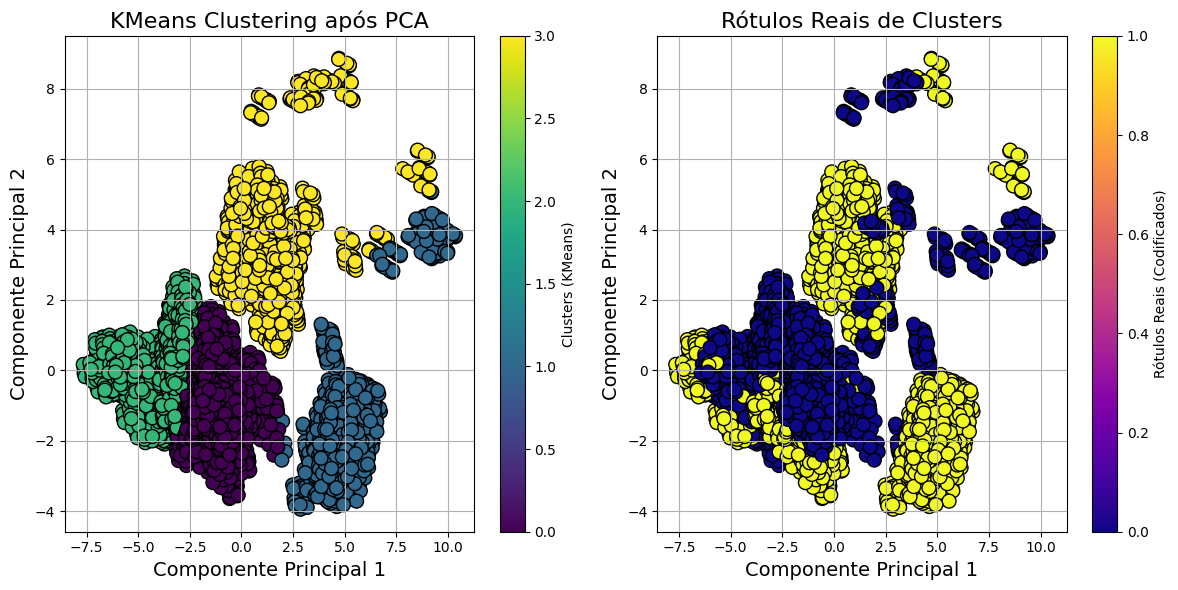

In [121]:

# Passo 2: Aplicar PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

# Passo 3: Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_pca)


# Passo 5: Visualizar os resultados
plt.figure(figsize=(12, 6))

# Plotar KMeans
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('KMeans Clustering após PCA', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Clusters (KMeans)')
plt.grid()

# Plotar rótulos reais
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Reais de Clusters', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Rótulos Reais (Codificados)')
plt.grid()

plt.tight_layout()
plt.show()


In [122]:
db = DBSCAN(eps=0.3, min_samples=15)
db.fit(X)

db_labels = db.labels_

In [123]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math



# print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(X,db.labels_))

print("\nRand Score K-means: ",metrics.rand_score(y,db.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(y,db.labels_))

print("\nCompletude : ",metrics.completeness_score(y,db.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(y, db.labels_))


Rand Score K-means:  0.5005844714084224

Homogeneidade :  0.0

Completude :  1.0

Matriz de contingência kmeans
 [[4208]
 [3916]]


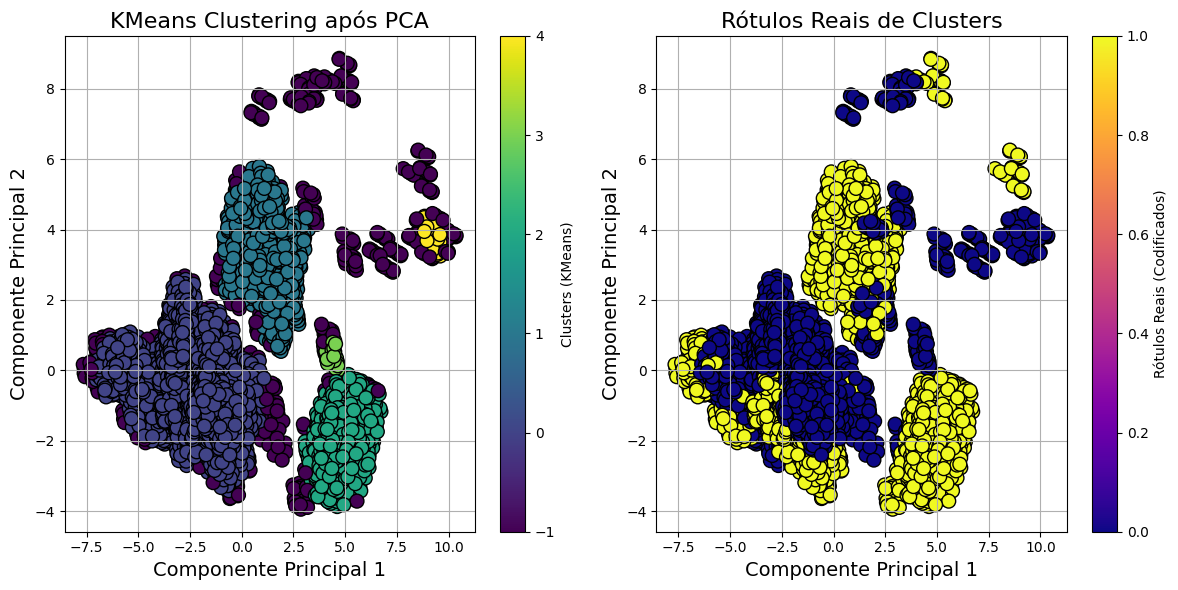

In [124]:

# Passo 2: Aplicar PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

# Passo 3: Aplicar KMeans
db = DBSCAN(eps=0.3, min_samples=15)
clusters = db.fit_predict(df_pca)


# Passo 5: Visualizar os resultados
plt.figure(figsize=(12, 6))

# Plotar KMeans
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('KMeans Clustering após PCA', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Clusters (KMeans)')
plt.grid()

# Plotar rótulos reais
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Reais de Clusters', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Rótulos Reais (Codificados)')
plt.grid()

plt.tight_layout()
plt.show()


In [125]:
Agnes = AgglomerativeClustering(n_clusters=3,linkage='ward')
Agnes.fit(X)



AgglomerativeClustering(n_clusters=3)

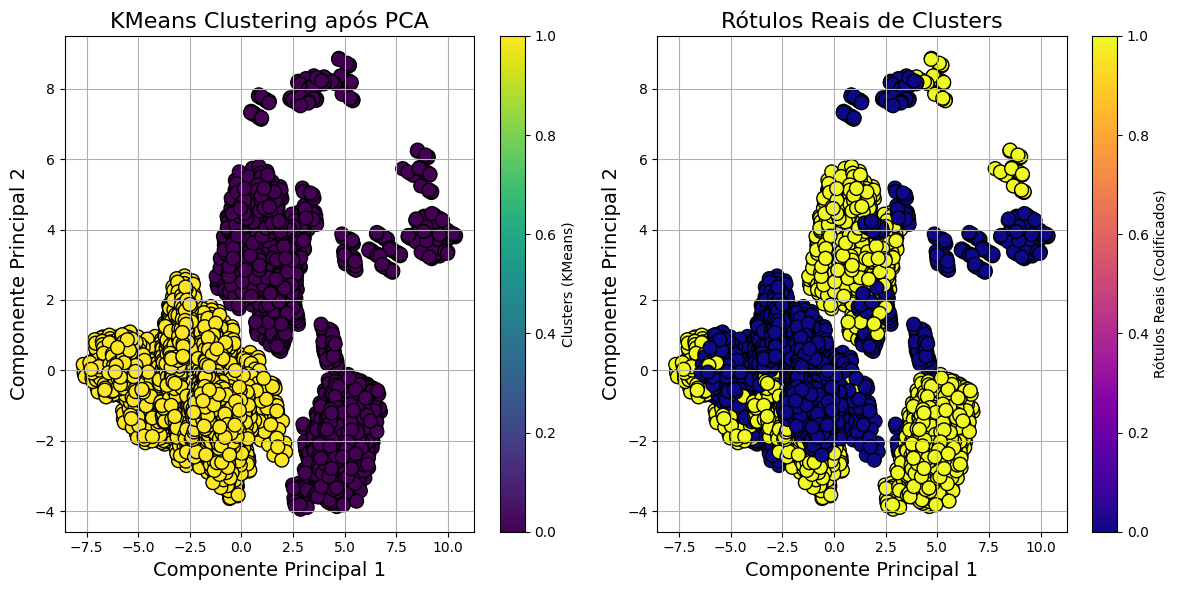

In [131]:

# Passo 2: Aplicar PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

# Passo 3: Aplicar KMeans
Agnes = AgglomerativeClustering(n_clusters=2,linkage='ward')
clusters = Agnes.fit_predict(df_pca)


# Passo 5: Visualizar os resultados
plt.figure(figsize=(12, 6))

# Plotar KMeans
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('KMeans Clustering após PCA', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Clusters (KMeans)')
plt.grid()

# Plotar rótulos reais
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Reais de Clusters', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Rótulos Reais (Codificados)')
plt.grid()

plt.tight_layout()
plt.show()


In [127]:


print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(X,db.labels_))

print("\nRand Score K-means: ",metrics.rand_score(y,db.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(y,db.labels_))

print("\nCompletude : ",metrics.completeness_score(y,db.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(y, db.labels_))


Coeficiente de Silhueta:  0.25864245750883647

Rand Score K-means:  0.6992992040823836

Homogeneidade :  0.5026144245403482

Completude :  0.29713991185002037

Matriz de contingência kmeans
 [[ 264 3726  112   22   34   50]
 [ 161  741 1300 1714    0    0]]
